![dw_waw_logo.png](https://raw.githubusercontent.com/JBalcony/DataWorkshop_SMOG/master/DW_warsaw_logo/dw_waw_logo.png)

**Author : Salem Albarudy > [Github](https://github.com/salalba) | WebSite | Linkedin | YouTube**

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import os
import time

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# import seaborn as sns
# sns.set()


# Ignore useless warnings (see SciPy issue #5998)
# import warnings
# warnings.filterwarnings(action="ignore", message="^internal gelsd")

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

import category_encoders as ce
from category_encoders import BinaryEncoder


In [2]:
# Paths ...
PROJECT_ROOT_DIR = os.getcwd()
# PATH_TO_DATA = '../../data'  # TODO make cross
PATH_TO_DATA = '..\..\data'  # TODO make cross

# Encoding Categorical Variables


## Table of content
1. [TL;DR](#tl-dr)
2. [Label Encoding](#label-encoding)
3. [One Hot Encoding](#one-hot-encoding)
4. [Data](#Data)
5. [Split Data](#split-data)
6. [Missing Data](#missing-data)
7. [Examples](#Examples)
    * Just numerical.
    * Label Encoding.
    * One Hot Encoding.
    * Count Encoding.
    * Binary Encoding.

8. [Summary](#Summary)
9. [What Next ?](what-next)
10. [Resources](#Resources)


## TL;DR

* [Category Encoders](https://github.com/scikit-learn-contrib/category_encoders)
* [scikit-learn](scikit-learn.org)


<img src="https://raw.githubusercontent.com/SalAlba/machine-learning/master/notes/encoding-categorical-variables/images/ROC-different-encoding-strategies.png" width="650" height="150">

## Label Encoding

###### [image sources [4.1.]](#resources)

![label-encoding.png](https://raw.githubusercontent.com/SalAlba/machine-learning/master/notes/encoding-categorical-variables/images/label-encoding.png)

## One Hot Encoding

###### [image sources [4.1.]](#resources)
![one-hot-encoding.png](https://raw.githubusercontent.com/SalAlba/machine-learning/master/notes/encoding-categorical-variables/images/one-hot-encoding.png)

## Data

Credit Approval Data Set [sources](https://archive.ics.uci.edu/ml/datasets/credit+approval)

### Data Set Information:

This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data.

This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. `There are also a few missing values.`


#### Attribute Information:

A1: b, a.

A2: continuous.

A3: continuous.

A4: u, y, l, t.

A5: g, p, gg.

A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.

A7: v, h, bb, j, n, z, dd, ff, o.

A8: continuous.

A9: t, f.

A10: t, f.

A11: continuous.

A12: t, f.

A13: g, p, s.

A14: continuous.

A15: continuous.

A16: +,- (class attribute)

In [3]:
data = pd.read_csv(os.path.join(PATH_TO_DATA, 'crx', 'crx.data'), header=None)

varnames = ['A'+str(s) for s in range(1,17)]
data.columns = varnames

data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [5]:
data.describe()

,A3,A8,A11,A15
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [6]:
# Replace the question marks in the dataset with NumPy NaN values:
data = data.replace('?', np.nan)

# re-cast some variables to the correct types 
data['A2'] = data['A2'].astype('float')
data['A14'] = data['A14'].astype('float')

# encode target to binary
data['A16'] = data['A16'].map({'+':1, '-':0})

# display
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


In [7]:
# find categorical variables
cat_cols = [c for c in data.columns if data[c].dtypes=='O']
data[cat_cols].head(2)

,A1,A4,A5,A6,A7,A9,A10,A12,A13
0,b,u,g,w,v,t,t,f,g
1,a,u,g,q,h,t,t,f,g


In [8]:
# find numerical variables
num_cols = [c for c in data.columns if data[c].dtypes!='O']
data[num_cols].head(2)

,A2,A3,A8,A11,A14,A15,A16
0,30.83,0.00,1.25,1,202.0,0,1
1,58.67,4.46,3.04,6,43.0,560,1


In [9]:
data.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

## Split Data

In [10]:
# let's separate into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['A16'], axis=1),  # predictors
    data['A16'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((483, 15), (207, 15))

## Missing Data


###### [image sources [4.2.]](#resources)

![missing-values.png](https://raw.githubusercontent.com/SalAlba/machine-learning/master/notes/encoding-categorical-variables/images/missing-values.png)

### Numerical variables

In [11]:
num_cols.remove('A16')
num_cols, cat_cols

(['A2', 'A3', 'A8', 'A11', 'A14', 'A15'],
 ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13'])

In [12]:
X_train[num_cols].isnull().sum()

A2     11
A3      0
A8      0
A11     0
A14     7
A15     0
dtype: int64

In [13]:
is_NaN = X_train.isnull()
row_has_NaN = is_NaN.any(axis=1)

X_train[row_has_NaN]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
97,b,NaN,0.500,u,g,c,bb,0.835,t,f,0,t,s,320.0,0
206,a,71.58,0.000,NaN,NaN,NaN,NaN,0.000,f,f,0,f,p,NaN,0
243,a,18.75,7.500,u,g,q,v,2.710,t,t,5,f,g,NaN,26726
489,NaN,45.33,1.000,u,g,q,v,0.125,f,f,0,t,g,263.0,0
520,NaN,20.42,7.500,u,g,k,v,1.500,t,t,1,f,g,160.0,234
270,b,37.58,0.000,NaN,NaN,NaN,NaN,0.000,f,f,0,f,p,NaN,0
626,b,22.00,7.835,y,p,i,bb,0.165,f,f,0,t,g,NaN,0
500,b,NaN,4.000,u,g,x,v,5.000,t,t,3,t,g,290.0,2279
329,b,NaN,4.000,y,p,i,v,0.085,f,f,0,t,g,411.0,0
83,a,NaN,3.500,u,g,d,v,3.000,t,f,0,t,g,300.0,0


In [14]:
# fill in missing values

# num Version.1.
# data[num_cols] = data[num_cols].fillna(0)

# num Version.2.
imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
X_train[num_cols] = imp_mean.fit_transform(X_train[num_cols])
X_test[num_cols] = imp_mean.transform(X_test[num_cols])

In [15]:
X_train[num_cols].isnull().sum()

A2     0
A3     0
A8     0
A11    0
A14    0
A15    0
dtype: int64

In [16]:
X_test[num_cols].isnull().sum()

A2     0
A3     0
A8     0
A11    0
A14    0
A15    0
dtype: int64

### Categorical Variables

In [17]:
# cat ...
X_train[cat_cols] = X_train[cat_cols].fillna('Missing')
X_test[cat_cols] = X_test[cat_cols].fillna('Missing')

X_train[cat_cols].isnull().sum()

A1     0
A4     0
A5     0
A6     0
A7     0
A9     0
A10    0
A12    0
A13    0
dtype: int64

In [18]:
X_train[X_train.A4 == 'Missing']

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
206,a,71.58,0.0,Missing,Missing,Missing,Missing,0.0,f,f,0.0,f,p,160.0,0.0
270,b,37.58,0.0,Missing,Missing,Missing,Missing,0.0,f,f,0.0,f,p,160.0,0.0
592,b,23.17,0.0,Missing,Missing,Missing,Missing,0.0,f,f,0.0,f,p,160.0,0.0
622,a,25.58,0.0,Missing,Missing,Missing,Missing,0.0,f,f,0.0,f,p,160.0,0.0


In [19]:
# num Version.2.
imp_moda = SimpleImputer(missing_values='Missing', strategy='most_frequent')

X_train[cat_cols] = imp_moda.fit_transform(X_train[cat_cols])
X_test[cat_cols] = imp_moda.transform(X_test[cat_cols])

In [20]:
for cat in cat_cols:
    print(cat, '>>', X_train[cat].unique())

A1 >> ['a' 'b']
A4 >> ['u' 'y' 'l']
A5 >> ['g' 'p' 'gg']
A6 >> ['c' 'q' 'w' 'ff' 'm' 'i' 'e' 'cc' 'x' 'd' 'k' 'j' 'aa' 'r']
A7 >> ['v' 'ff' 'h' 'dd' 'z' 'bb' 'j' 'n' 'o']
A9 >> ['t' 'f']
A10 >> ['t' 'f']
A12 >> ['t' 'f']
A13 >> ['g' 's' 'p']


In [21]:
X_train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
596,a,46.08,3.000,u,g,c,v,2.375,t,t,8.0,t,g,396.0,4159.0
303,a,15.92,2.875,u,g,q,v,0.085,f,f,0.0,f,g,120.0,0.0
204,b,36.33,2.125,y,p,w,v,0.085,t,t,1.0,f,g,50.0,1187.0
351,b,22.17,0.585,y,p,ff,ff,0.000,f,f,0.0,f,g,100.0,0.0
118,b,57.83,7.040,u,g,m,v,14.000,t,t,6.0,t,g,360.0,1332.0


## Examples

In [22]:
def check_model(X_train, X_test, y_train, y_test):
    model, auc_score = None, 0

    # ...
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)

    # ...
    y_pred = model.predict(X_test)
    auc_score = metrics.roc_auc_score(y_test, y_pred)
    test_score = model.score(X_test, y_test)
    return model, auc_score, train_score, test_score

### Just numerical

In [23]:
# Make copy to avoid changing original data 
X_train_no_cat = X_train.copy()
X_test_no_cat = X_test.copy()

X_train_no_cat = X_train_no_cat[num_cols]
X_test_no_cat = X_test_no_cat[num_cols]

X_train_no_cat.shape

(483, 6)

In [24]:
model_no_cat , auc_score_no_cat, train_score_no_cat, test_score_no_cat = check_model(
    X_train_no_cat,
    X_test_no_cat,
    y_train,
    y_test
)

print('Train score : ', train_score_no_cat)
print('Test score : ', test_score_no_cat)
print('Validation AUC score : ', auc_score_no_cat)

Train score :  1.0
Test score :  0.7536231884057971
Validation AUC score :  0.7384615384615385


### Label Encoder

In [25]:
# Make copy to avoid changing original data 
label_X_train = X_train.copy()
label_X_test = X_test.copy()


# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in cat_cols:
    label_X_train[col] = label_encoder.fit_transform(X_train[col])
    label_X_test[col] = label_encoder.transform(X_test[col])


label_X_train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
596,0,46.08,3.000,1,0,1,7,2.375,1,1,8.0,1,0,396.0,4159.0
303,0,15.92,2.875,1,0,10,7,0.085,0,0,0.0,0,0,120.0,0.0
204,1,36.33,2.125,2,2,12,7,0.085,1,1,1.0,0,0,50.0,1187.0
351,1,22.17,0.585,2,2,5,2,0.000,0,0,0.0,0,0,100.0,0.0
118,1,57.83,7.040,1,0,9,7,14.000,1,1,6.0,1,0,360.0,1332.0


In [26]:
model_label , auc_score_label, train_score_label, test_score_label = check_model(label_X_train, label_X_test, y_train, y_test)

print('Label Train score : ', train_score_label)
print('Label Test score : ', test_score_label)
print('Label Validation AUC score : ', auc_score_label)

Label Train score :  1.0
Label Test score :  0.8502415458937198
Label Validation AUC score :  0.8431623931623932


In [27]:
# Make copy to avoid changing original data 
OH_X_train = X_train.copy()
OH_X_test = X_test.copy()

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(OH_X_train[cat_cols]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(OH_X_test[cat_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = OH_X_train.index
OH_cols_test.index = OH_X_test.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = OH_X_train.drop(cat_cols, axis=1)
num_X_test = OH_X_test.drop(cat_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

print(OH_X_train.shape)
OH_X_train.head()

(483, 46)


,A2,A3,A8,A11,A14,A15,0,1,2,3,...,30,31,32,33,34,35,36,37,38,39
596,46.08,3.000,2.375,8.0,396.0,4159.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
303,15.92,2.875,0.085,0.0,120.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
204,36.33,2.125,0.085,1.0,50.0,1187.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
351,22.17,0.585,0.000,0.0,100.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
118,57.83,7.040,14.000,6.0,360.0,1332.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [28]:
model_OH , auc_score_OH, train_score_OH, test_score_OH = check_model(OH_X_train, OH_X_test, y_train, y_test)

print('OH Train score : ', train_score_OH)
print('OH Test score : ', test_score_OH)
print('OH Validation AUC score : ', auc_score_OH)

OH Train score :  1.0
OH Test score :  0.8599033816425121
OH Validation AUC score :  0.852991452991453


###  Count Encoding

In [29]:
# Make copy to avoid changing original data 
count_X_train = X_train.copy()
count_X_test = X_test.copy()

# Create the encoder
count_enc = ce.CountEncoder()

# Transform the features, rename the columns with the _count suffix, and join to dataframe
train_count_encoded = count_enc.fit_transform(count_X_train[cat_cols])
test_count_encoded = count_enc.fit_transform(count_X_test[cat_cols])

count_X_train = pd.concat([count_X_train[num_cols], train_count_encoded], axis=1)
count_X_test = pd.concat([count_X_test[num_cols], test_count_encoded], axis=1)

print(count_X_train.shape)
count_X_train.head()

(483, 15)


,A2,A3,A8,A11,A14,A15,A1,A4,A5,A6,A7,A9,A10,A12,A13
596,46.08,3.000,2.375,8.0,396.0,4159.0,144,367,367,97,281,256,212,220,441
303,15.92,2.875,0.085,0.0,120.0,0.0,144,367,367,56,281,227,271,263,441
204,36.33,2.125,0.085,1.0,50.0,1187.0,339,115,115,48,281,256,212,263,441
351,22.17,0.585,0.000,0.0,100.0,0.0,339,115,115,38,41,227,271,263,441
118,57.83,7.040,14.000,6.0,360.0,1332.0,339,367,367,26,281,256,212,220,441


In [30]:
model_count , auc_score_count, train_score_count, test_score_count = check_model(count_X_train, count_X_test, y_train, y_test)

print('count Train score : ', train_score_count)
print('count Test score : ', test_score_count)
print('count Validation AUC score : ', auc_score_count)

count Train score :  1.0
count Test score :  0.5555555555555556
count Validation AUC score :  0.4927350427350427


### Binary Encoding

In [31]:
# Make copy to avoid changing original data 
binary_X_train = X_train.copy()
binary_X_test = X_test.copy()

binary_encoder = BinaryEncoder(cols=cat_cols, drop_invariant=True)

binary_X_train = binary_encoder.fit_transform(binary_X_train)
binary_X_test = binary_encoder.transform(binary_X_test)

print(binary_X_train.shape)
binary_X_train.head()

(483, 28)


,A1_0,A1_1,A2,A3,A4_1,A4_2,A5_1,A5_2,A6_1,A6_2,...,A9_1,A10_0,A10_1,A11,A12_0,A12_1,A13_1,A13_2,A14,A15
596,0,1,46.08,3.000,0,1,0,1,0,0,...,1,0,1,8.0,0,1,0,1,396.0,4159.0
303,0,1,15.92,2.875,0,1,0,1,0,0,...,0,1,0,0.0,1,0,0,1,120.0,0.0
204,1,0,36.33,2.125,1,0,1,0,0,0,...,1,0,1,1.0,1,0,0,1,50.0,1187.0
351,1,0,22.17,0.585,1,0,1,0,0,1,...,0,1,0,0.0,1,0,0,1,100.0,0.0
118,1,0,57.83,7.040,0,1,0,1,0,1,...,1,0,1,6.0,0,1,0,1,360.0,1332.0


In [32]:
binary_encoder.base_n_encoder

BaseNEncoder(cols=['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13'],
             drop_invariant=True,
             mapping=[{'col': 'A1',
                       'mapping':     A1_0  A1_1
 1     0     1
 2     1     0
-1     0     0
-2     0     0},
                      {'col': 'A4',
                       'mapping':     A4_0  A4_1  A4_2
 1     0     0     1
 2     0     1     0
 3     0     1     1
-1     0     0     0
-2     0     0     0},
                      {'col': 'A5',
                       'mapping':     A5_0  A5_1  A5_2
 1     0     0     1
 2     0     1     0
 3     0     1     1
-1     0     0     0
-2     0     0     0},
                      {'col': 'A6',
                       'mapping':      A6_0  A6_1  A6_2  A6_3  A6_4
 1      0     0     0     0     1
 2      0     0     0     1     0
 3      0     0     0     1     1
 4      0     0     1     0     0
 5      0     0     1     0     1
 6      0     0     1     1     0
 7      0     0     1     1     1
 8  

In [33]:
X_train.A7.unique()

array(['v', 'ff', 'h', 'dd', 'z', 'bb', 'j', 'n', 'o'], dtype=object)

In [34]:
binary_X_train[['A7_1', 'A7_2', 'A7_3', 'A7_4']]

,A7_1,A7_2,A7_3,A7_4
596,0,0,0,1
303,0,0,0,1
204,0,0,0,1
351,0,0,1,0
118,0,0,0,1
...,...,...,...,...
359,0,0,1,0
192,0,0,0,1
629,0,0,0,1
559,0,0,1,1


In [35]:
model_binary , auc_score_binary, train_score_binary, test_score_binary = check_model(
    binary_X_train,
    binary_X_test,
    y_train,
    y_test
)

print('binary Train score : ', train_score_binary)
print('binary Test score : ', test_score_binary)
print('binary Validation AUC score : ', auc_score_binary)

binary Train score :  1.0
binary Test score :  0.8454106280193237
binary Validation AUC score :  0.8401709401709402


In [36]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve

In [37]:
models = []
models.append(('Binary Encoding', model_binary, binary_X_test, auc_score_binary))
models.append(('Label Encoding', model_label, label_X_test, auc_score_label))
models.append(('One Hot Encoding', model_OH, OH_X_test, auc_score_OH))
models.append(('Count Encoding', model_count, count_X_test, auc_score_count))
models.append(('No Categorical variables', model_no_cat, X_test_no_cat, auc_score_no_cat))

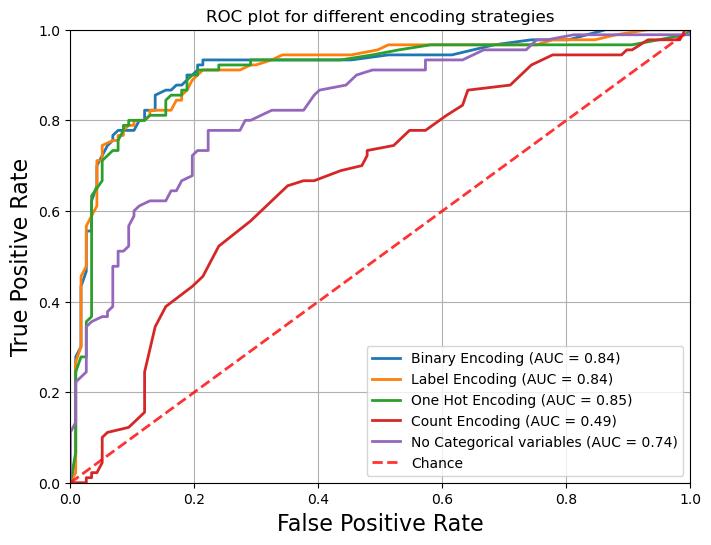

In [38]:
def plot_roc_curve(fpr, tpr, label=None, auc=0):
    label = '{0} (AUC = {1})'.format(label, round(auc, 2))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)


plt.figure(figsize=(8, 6), dpi=100)
for name, model, _X_test, auc in models:
    y_scores = model.predict_proba(_X_test)[:,1]        
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    plot_roc_curve(fpr, tpr, name, auc)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
plt.title('ROC plot for different encoding strategies')
plt.legend(loc="lower right", fontsize=10)
plt.grid()
plt.show();

## Summary

## What Next ?



## Resources


### Books
1. [[1.1.] Python Feature Engineering Cookbook](https://www.packtpub.com/product/python-feature-engineering-cookbook/9781789806311)
    1. [Github](https://github.com/PacktPublishing/Python-Feature-Engineering-Cookbook)


### Papers
0. [[2.0.] ...](#)


### Web
0. [[3.0.] ...](#)


### Images
1. [[4.1.] kaggle categorical variables](https://www.kaggle.com/alexisbcook/categorical-variables)
1. [[4.2.] kaggle missing values](https://www.kaggle.com/alexisbcook/missing-values)

pip install feature-engine

pip install category_encoders

<!--
https://github.com/scikit-learn-contrib/scikit-learn-contrib/blob/master/README.md

https://www.trainindata.com/feature-engine

https://feature-engine.readthedocs.io/en/latest/encoders/index.html
-->